# 기초 예제

- 이번 실습에서는 OpenCV를 다루기 위한 기초 예제를 다룬다.
- OpenCV는 영상 처리 이론과 이미지 구성요소, 기본 데이터 타입을 활용해 이미지를 처리한다.
- OpenCV는 N차원 배열에 대한 복합적인 연산을 수행할 수 있지만, 주된 용도는 이미지 처리다.
- 이미지는 2차원 배열인 행렬이다.

## 1. 이미지 입력

- 이미지 파일의 형식은 수백 가지다.   
- OpenCV에서 이미지를 다룰 경우 가장 많이 사용되는 이미지 형식은 JPG나 PNG 등의 래스터 그래픽스 이미지 파일 포맷이다.   
- 래스터 그래픽스: 비트맵 이미지를 뜻하며, 격자판의 형태로 각 격자마다 화소의 데이터가 담겨 있는 이미지 파일 포맷이다.

- OpenCV는 래스터 그래픽스 이미지 파일 포맷을 쉽게 불러올 수 있는 별도의 함수를 제공한다.
- 이러한 함수는, 이미지 데이터 구조에 필요한 메모리를 할당하고, 파일 시그니처(저장 형식)를 읽어 코덱 을 결정한다.
- 코덱 : 어떠한 데이터 스트림이나 신호에 대해, 인코딩이나 디코딩, 혹은 둘 다를 할 수 있는 하드웨어나 소프트웨어를 일컫는다.

In [ ]:
# Python OpenCV의 이미지 입력 함수
cv2.imread(
    fileName,
    flags = cv2.IMREAD_COLOR
)

- 파일명 : 경로를 포함한 입력 파일의 이름(절대경로/상대경로 상대경로일 경우 실행하고있는 .py가 있는 경로를 기준으로 한다.)
- 플래그 : 입력된 파일을 어떻게 해석할지 결정

#### 절대경로 : 이미지의 전체 경로(헤드라인으로부터)

- D:/Images/Orange.png
- /usr/local/Images/Orange.png

#### 상대경로 : 현재 위치로부터의 상대적인 경로(이 경우 .py 파일이 존재하는 위치를 기준 경로로 삼는다)

- ../Orange.png

#### 플래그의 기본값과 옵션

- 기본값을 '색상값'으로 가짐
- 기본 플래그는 8비트, 3채널, BGR 이미지로 세팅되어 있다.

- cv.IMREAD_GRAYSCALE(그레이스케일)
- cv.IMREAD_COLOR(컬러이미지)
- cv.IMREAD_UNCHANGED(알파 채널을 포함하여 이미지 반환/알파 없을 경우 일반 컬러로 반환)

- python의 경우, 이미지가 존재하지 않아도 오류가 나지 않는다.(C#은 오류로 처리됨)
- 이는 이미지(로 변환될 행렬)가 존재하지 않는 경우, 반환값이 None이 되기 때문이다.
- 색상 이미지는 BGR 순서로 저장된다.

In [ ]:
# 예제 4.2 Python OpenCV에서의 이미지 입력
import cv2

src = cv2.imread("OpenCV_Logo.png", cv2.IMREAD_GRAYSCALE)

print(src.ndim, src.shape, src.dtype)

## 2. 이미지 출력

- 지금까지는 이미지를 행렬로 처리하고, 데이터로 확인하였으나 이미지를 시각적으로 확인해보는 것도 중요하다.
- OpenCV는 HighGUI라 불리는 라이브러리를 지원하여, 이 라이브러리를 활용하여 윈도우를 열고, 윈도우에 이미지를 출력하도록 할 수 있다.

In [ ]:
# Python OpenCV의 이미지 출력 함수
cv2.imshow(
    winname,
    ndarray
)

- 윈도우를 통해 이미지 출력이 가능함
- winname : 윈도우 이름
- ndarray : 이미지 행렬
- 윈도우의 속성을 변경할 때는 변수가 아니라 winname에 변경 속성을 적용한다.

In [ ]:
# 예제 4.4 Python OpenCV에서의 이미지 출력
import cv2

src = cv2.imread("OpenCV_Logo.png", cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("src", flags=cv2.WINDOW_FREERATIO)
cv2.resizeWindow("src", 400, 200)
cv2.imshow("src", src)
cv2.waitKey(0)
cv2.destroyWindow("src")

- cv2.namedWindow(winname, flags = None) 함수는 화면에 이미지를 표시할 수 있는 윈도우를 생성
- cv2.resizeWindow(winname, width, height) 함수는 winname과 동일한 윈도우의 크기를 설정
- cv2.imshow(string winname, Mat mat) 함수는 윈도우에 이미지를 표시
- cv2.waitKey(int delay) 함수는 지정된 시간 동언 키 입력이 있을 때까지 프로그램을 지연시킴. 0이나 음수일 경우 키 입력이 있을 때까지 대기
- cv2.destroyWindow(string winName) 함수는 윈도우를 제거

### 마우스 콜백

-콜백(Callback) 함수는 매개 변수를 통해 다른 함수를 전달받고, 이벤트가 발생할 때 매개 변수에 전달된 함수를 호출하는 역할을 한다.   
-즉, 이벤트가 발생하면 다른 함수를 실행하는 함수를 의미한다

In [ ]:
# Python OpenCV의 마우스 콜백 설정 함수
cv2.setMouseCallback(
    windowName,
    onMouse,
    param = None
)

In [ ]:
# Python OpenCV의 마우스 콜백 설정 함수
def func_name(
    event,
    x,
    y,
    flags,
    param
)

- 마우스 이벤트: 마우스의 동작을 전달
- 마우스 좌표: 마우스 이벤트가 발생했을 때의 좌표를 전달
- 마우스 플래그: 마우스 동작에 대한 특수한 정보나 방식을 전달

In [ ]:
# 예제 4.4 Python OpenCV에서의 마우스 콜백 적용
import cv2
import numpy as np

def mouse_event(event, x, y, flags, param):
    global radius

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(param, (x, y), radius, (255, 0, 0), 2)
        cv2.imshow("draw", src)

    elif event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:
            radius += 1
        elif radius > 1:
            radius -= 1

radius = 3
src = np.full((500, 500, 3), 255, dtype=np.uint8)

cv2.imshow("draw", src)
cv2.setMouseCallback("draw", mouse_event, src)
cv2.waitKey()
cv2.destroyAllWindows()

## 3. 동영상 출력

- OpenCV를 이용하면 동영상 파일을 출력할 수 있다. 동영상 파일에서 순차적으로 프레임을 읽어, 이미지의 형태로 출력한다.
- 동영상 파일을 읽으려면 컴퓨터에 동영상 코덱을 읽을 수 있는 라이브러리가 설치되어 있어야 한다.
- OpenCV는 FFMPEG를 지원하므로 AVI나 MP4 등 다양한 형식의 동영상 파일을 손쉽게 읽을 수 있다.

- FFMPEG : FFmpeg은 디지털 음성 스트림과 영상 스트림에 대해서 다양한 종류의 형태로 기록하고 변환하는 컴퓨터 프로그램이다.

In [ ]:
# Python OpenCV의 동영상 입력 클래스
capture = cv2.VideoCapture(fileName)

- 파일명 : 경로를 포함한 입력 파일의 이름

In [1]:
# 예제 4.8 Python OpenCV의 동영상 출력
import cv2

capture = cv2.VideoCapture("Star.mp4")

while True:
    ret, frame = capture.read()

    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("Star.mp4")

    cv2.imshow("VideoFrame", frame)
    if cv2.waitKey(33) == ord('q'): break

capture.release()
cv2.waitKey() # q를 입력하면 재생 중지
cv2.destroyAllWindows()

- capture.read():  동영상 파일에서 프레임을 가져와 압축을 해제한 다음 bool과 ndarray 타입의 값을 반환
- ret(bool):  capture 변수에서 정장적으로 프레임을 읽었는지를 나타냄
- frame(ndarray): 현재 프레임을 나타냄
- capture.release(): 동영상 재생이 끝났다면 동영상 파일을 닫고 메모리를 해제

### FPS(Frame Per Second)

- 동영상을 출력할 때 중요한 요소는 영상이 바뀌는 속도이다.(== 화면이 얼마나 부드럽게 재생되느냐)
- 동영상은 멈춰있는 사진들이 순차적으로 출력되어 움직이는 화면처럼 만든 것을 의미한다.
- FPS(초당 프레임)가 높을수록 화면이 끊기지 않고 자연스럽게 출력된다.

- Interval : 대기할 밀리초 단위

## 4. 카메라 출력

- 카메라 출력은 카메라가 스트리밍 형태로 동작할 때 사용한다.
- 즉, 저장된 이미지나 동영상 파일이 아니라 데이터를 실시간으로 받아오고 분석해야 하는 경우 카메라를 이용해 데이터를 처리한다.

In [ ]:
#  Python opencv의 카메라 출력
capture = cv2.VideoCapture(index)

- index는 카메라의 장치 번호(ID)
- 웹캠이 내장된 노트북이나, 카메라가 없는 컴퓨터에 카메라를 연결할 경우 장치 번호는 0을 사용한다.
- 그 외에 1,2,3 등의 장치번호를 사용해 추가된 외부 카메라를 사용할 수 있다

In [3]:
# 예제 4.10 Python opencv의 카메라 출력
import cv2

capture = cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = capture.read()
    if ret == True:
        cv2.imshow("VideoFrame", frame)
        if cv2.waitKey(33) == ord('q'): break
    else:
        break

capture.release()
cv2.destroyAllWindows()

## 5. 이미지 연결

- 이미지 연결은 서로 다른 이미지를 이어 붙여 하나의 이미지로 만드는 기능
- 주로, 서로 다른 이미지를 병합해 하나의 이미지로 만들거나, 알고리즘 적용 전 이미지와 알고리즘이 적용된 이미지를 상호 비교하기 위해 사용

In [ ]:
# Python OpenCV의 수평 이미지 연결 함수
dst = cv2.hconcat(
    src
)

In [ ]:
# Python OpenCV의 수직 이미지 연결 함수
dst = cv2.vconcat(
    src
)

- 연결할 이미지는 같은 채널과 정밀도를 가져야 하며, 다를 경우 연결 불가능
- 만약 서로 다른 채널과 정밀도를 가지는 이미지를 연결하려면 동일한 채널과 정밀도를 갖게 변경해야 한다.

In [4]:
# 예제 4.12 Python OpenCV에서의 이미지 연결 적용
import cv2
import numpy as np

one = cv2.imread("one.jpg")
two = cv2.imread("two.jpg")
three = cv2.imread("three.jpg")
four = cv2.imread("four.jpg")

horizontal1 = np.full((50, one.shape[1], 3), [0, 0, 0], dtype=np.uint8)
horizontal2 = np.full((50, two.shape[1], 3), (0, 0, 0), dtype=np.uint8)

left = cv2.vconcat((one, horizontal1, three))
# left = np.vstack((one, horizontal1, three))
# right = cv2.vconcat((two, horizontal2, four))
right = np.vstack((two, horizontal2, four))

vertical = np.full((left.shape[0], 50, 3), 0, dtype=np.uint8)

dst = cv2.hconcat((left, vertical, right))
# dst = np.hstack((left, vertical, right))
# dst = np.concatenate((left, line, right), axis=1)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 6. 도형 그리기

- 도형 그리기는 영상이나 이미지 위에 그래픽을 그리는 것을 의미한다.
- OpenCV의 도형 그리기 함수는 검출 결과를 시각적으로 표시하는 데 사용된다.

- 도형 그리기 함수는 모든 정밀도와 채널에 대해 동작한다.
- 행렬(이미지)이 아닌 배열에도 도형을 그릴 수 있다.
- 그리기 함수는 위치, 두께, 색상, 선형 타입, 비트 시프트(bit shift) 등의 인수를 활용해 개체를 그린다.

### 선형 타입

- 도형을 그릴 때 어떤 유형의 선으로 그릴 지 결정하는 인수
    1. 브레젠험 알고리즘(Bresenham's algorithm)
    2. 안티 에일리어싱(Anti-Aliasing)
    3. 내부 채우기

1. 브레젠험 알고리즘(Bresenham's algorithm)

- (4연결-8연결)
- 4연결 : 위아래좌우
- 8연결 : 위아래좌우대각선

2. 안티 에일리어싱(Anti-Aliasing)

- 영상 신호의 결함을 없애기 위한 방법
- 이미지, 객체 가장자리 부분의 계단 현상을 없애기 위해 선을 둥글게 그리는 방식

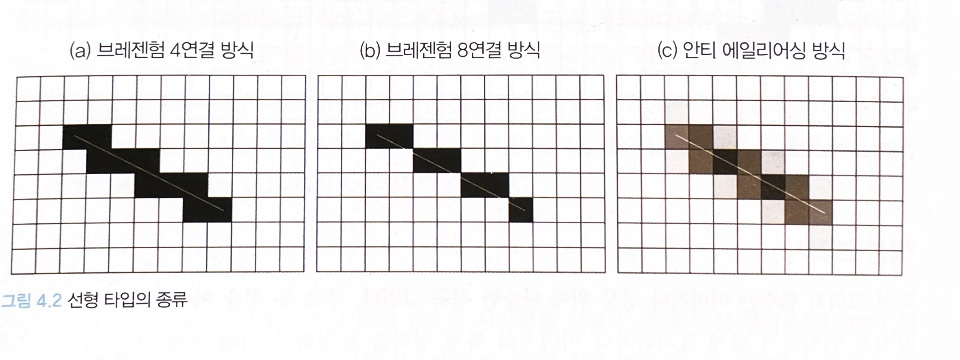

### 직선 그리기

- 직선 그리기 함수는 이미지나 영상 위에 단순한 선을 그린다.
- 주로 두 점을 이어 검출된 결과를 사용자가 인식하기 쉽게 표시하거나 이미지의 특정 영역을 보정하기 위해 사용

In [ ]:
cv2.line(
    img, 
    pt1,
    pt2,
    color,
    thickness=None,
    lineType=None,
    shift=None
)

### 사각형 그리기

- 사각형 그리기 함수는 이미지나 영상 위에 단순한 사각형을 그린다.
- 주로 관심 영역을 설정하기 위한 변숫값으로 활용하거나 검출된 결과를 사용하가 인식하기 쉽게 표시하는 데 사용

In [ ]:
cv2.rectangle(
    img, 
    pt1,
    pt2,
    color,
    thickness=None,
    lineType=None,
    shift=None
)

### 원 그리기

- 원 그리기 함수는 이미지나 영상 위에 단순한 원을 그린다.
- 주로 검출된 좌푯값을 사용자가 인식하기 쉽게 표시하는 데 사용

In [ ]:
cv2.circle(
    img,
    center, # 원의 중심
    radius, # 반지름
    color, 
    thickness=None,
    lineType=None,
    shift=None
)

### 호 그리기

- 호 그리기 함수는 이미지나 영상 위에 단순한 호나 타원을 그린다.
- 주로 검출된 타원을 그리거나 호을 그리거나 타원 객체의 부정확한 영역을 보정하기 위해 사용

In [ ]:
cv2.ellipse(
    img,
    center, # 원의 중심
    axes, # 장축과 단축
    angle, # 장축이 기울어진 각도
    startAngle, # 시작 각도
    endAngle, # 도착 각도
    color,
    thickness=None,
    lineType=None,
    shift=None
)

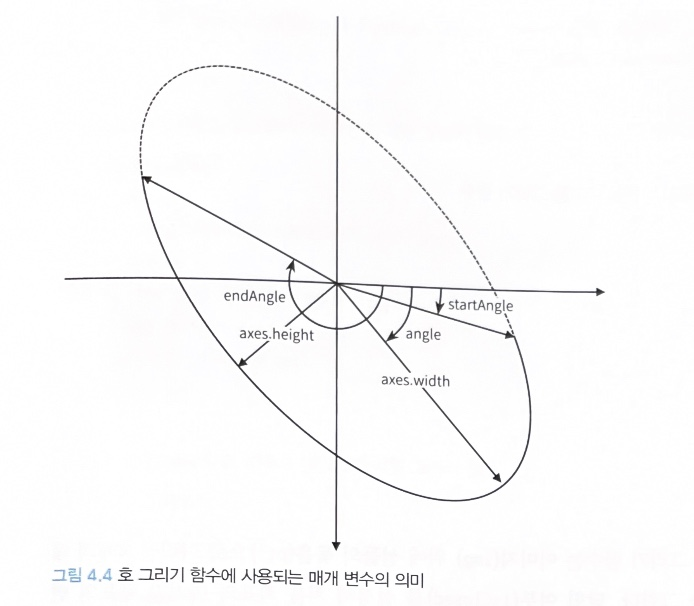

### 내부가 채워지지 않은 다각형 그리기

- 내부가 채워지지 않은 다각형 그리기 함수는 이미지나 영상 위에 여러개의 다각형 곡선을 그린다.
- 주로 복잡한 형상의 다각형을 그리거나 검출된 윤곽선의 일부를 시각적으로 확인할 때 사용

In [ ]:
cv2.polylines(img,
              pts, # 선들의 묶음
              isClosed, # 닫힘 여부: 처음 좌표와 마지막 좌표의 연결 여부 설정
              color,
              thickness=None,
              lineType=None,
              shift=None
             )

### 내부가 채워진 다각형 그리기

- 내부가 채워진 다각형 그리기 함수는 이미지나 영상 위에 내부가 채워진 여러 개의 다각형 곡선을 그린다.
- 주로 복잡한 형상의 다각형을 그리거나 검출된 결과를 이미지 위에 덮어 씌울 때 사용

In [ ]:
cv2.fillPoly(img,
             pts,
             color,
             thickness=None,
             lineType=None,
             shift=None
            )

### 문자 그리기

- 문자 그리기 함수는 이미지나 영상 위에 문자를 표시
- 주로 검출된 결과에 시각적으로 라벨을 표시 할 때 사용
- 문자 그리기는 문자를 이미지에 입력하는 것이 아닌, 문자를 그리는 방식

In [ ]:
cv2.putText(img,
            text, # 문자열
            org, # 좌측 상단 모서리
            fontFace, # 글꼴
            fontScale, # 글자 크기
            color,
            thickness=None,
            lineType=None,
            shift=None
           )

In [6]:
# Python OpenCV의 그리기 함수 활용
import numpy as np
import cv2

img = np.zeros((768, 1366, 3), dtype = np.uint8)

cv2.line(img, (100, 100), (1200, 100), (0, 0, 255), 3, cv2.LINE_AA)
cv2.circle(img, (300, 300), 50, (0, 255, 0), cv2.FILLED, cv2.LINE_4)
cv2.rectangle(img, (500, 200), (1000, 400), (255, 0, 0), 5, cv2.LINE_8)
cv2.ellipse(img, (1200, 300), (100, 50), 0, 90, 180, (255, 255, 0), 2)

pts1 = np.array([[[100, 500], [300, 500], [200, 600]], [[400, 500], [500, 500], [600, 700]]])
pts2 = np.array([[700, 500], [800, 500], [700, 600]])
cv2.polylines(img, pts1, True, (0, 255, 255), 2)
cv2.fillPoly(img, [pts2], (255, 0, 255), cv2.LINE_AA)

cv2.putText(img, "OpenCV", (900, 600), cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 2, (255, 255, 255), 3)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()